# Shark!!!!!
## Data driven conclusions on shark attacks worldwide.


The data that has no interest must first be removed so it is easier to draw a hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
rawData = pd.read_csv('GSAF5.csv', encoding = 'ISO-8859-1') # reading de csv file using pandas required using special encoding
rawData.head() #shows firs 5 rows of data so we can determine disposable data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


### Droping columns
Several columns can be droped from the data since they don't provide usefull information to reach any conclusions.

In [3]:
data = rawData.drop(['Case Number', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'], axis = 1)
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016"
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016"


With the new "data" table it's easier to analize the usable information and decide a hypothesis that can be tested with the available data.

## Hypothesis:

Given the available data, it is interesting to see if there is a relation between tha fatlity of the attacks and the activity that the victim was doing.  A conclusion could be reached identifying the higher risk activities related to shark attacks.

## Data Cleaning

In an initial visual inspection of the head of the data table it is evident that "Age" & "Species" columns are missing data, so further analisis searching for missing values is in order.

In [4]:
null_cols = data.isnull().sum()
print(null_cols[null_cols > 0])
print('Data entrys: {}'.format(len(data.index)-1))

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
dtype: int64
Data entrys: 5991


"Age", "Time" and "Species" have a significant ammount of null data.  These columns can be deleted since over half the entrys are empty.

A limit of 1000 empty cells is selected.  If the data  column has more than 1000 empty cells (17%) it is deleted.

From observing the first rows of the remaining data, we can see that the "Name" column has currupt data (male as name), and since the individual name of the victim is of no interest to us, we can delete the column.

The column "Injury" has a very specific discription of the victim's injury.  This type of data is hard to cuantify and the reult of the injury can be found on the "Fatal" column, so we can delete this column too.

The "Investigator or Source" column can be deleted since we have decided to trust all the data from the data set ignoring its origin.

In [5]:
drop_cols = list(null_cols[null_cols > 1000].index)
data = data.drop(drop_cols, axis=1)
data = data.drop(['Name' ,'Injury', 'Investigator or Source'], axis = 1)

data.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Fatal (Y/N)
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N


The core focus of the investigation is ACTIVITY, so a deeper analysis is in order.

In [6]:
data.fillna('Unknown', inplace = True) #replace all NaN values to "Unknown"
null_cols = data.isnull().sum()
print(null_cols[null_cols > 0]) #check if all NaN values have been replaced with "Unknown"


Series([], dtype: int64)


In [7]:
data.Activity.value_counts() #Display Activity entrys for visual analisis

Surfing                                                                     904
Swimming                                                                    819
Unknown                                                                     530
Fishing                                                                     414
Spearfishing                                                                321
Bathing                                                                     153
Wading                                                                      144
Diving                                                                      123
Standing                                                                     97
Snorkeling                                                                   77
Scuba diving                                                                 74
Body boarding                                                                54
Body surfing                            

In [8]:
#data2 = data['Activity'].where((data['Activity'].value_counts() == 1), 'Other' )
data = data.loc[data['Activity'].str.contains('Surf') ]
data2.head
#data2['Activity'] = 'Surfing'

<bound method NDFrame.head of                       Date  Year        Type       Country  \
0                18-Sep-16  2016  Unprovoked           USA   
1                18-Sep-16  2016  Unprovoked           USA   
2                18-Sep-16  2016  Unprovoked           USA   
3                17-Sep-16  2016  Unprovoked     AUSTRALIA   
4                16-Sep-16  2016  Unprovoked     AUSTRALIA   
10               05-Sep-16  2016  Unprovoked     AUSTRALIA   
13               29-Aug-16  2016  Unprovoked           USA   
14               29-Aug-16  2016  Unprovoked           USA   
15               27-Aug-16  2016  Unprovoked       REUNION   
19               04-Aug-16  2016  Unprovoked           USA   
24               26-Jul-16  2016  Unprovoked     AUSTRALIA   
25               24-Jul-16  2016  Unprovoked         JAPAN   
26               23-Jul-16  2016  Unprovoked     AUSTRALIA   
30               16-Jul-16  2016  Unprovoked           USA   
41               25-Jun-16  2016  Unprov

We can see that many of the Activity entrys are unique, so we can group all those instances in a category called "Other"
Every entry that is repeated less than 75 times (1.2 %) is dumped in the other category.

In [9]:
data['Activity'] = data['Activity'].where((data['Activity'] == 'Surfing') | 
                                          (data['Activity'] == 'Swimming') | 
                                          (data['Activity'] == 'Unknown') |
                                          (data['Activity'] == 'Fishing') |
                                          (data['Activity'] == 'Spearfishing') |
                                          (data['Activity'] == 'Bathing') |
                                          (data['Activity'] == 'Wading') |
                                          (data['Activity'] == 'Diving') |
                                          (data['Activity'] == 'Standing') |
                                          (data['Activity'] == 'Snorkeling'), 'Other' )
data.Activity.value_counts()


Other           2410
Surfing          904
Swimming         819
Unknown          530
Fishing          414
Spearfishing     321
Bathing          153
Wading           144
Diving           123
Standing          97
Snorkeling        77
Name: Activity, dtype: int64

After grouping the Activities, we can move into other columns to correct.

In [10]:
data.rename(columns={'Sex ':'Sex'}, inplace=True)
data.Sex.value_counts()

M          4835
F           585
Unknown     567
M             2
.             1
N             1
lli           1
Name: Sex, dtype: int64

In [11]:
data['Sex'] = data['Sex'].str.replace('M ', 'M')
data['Sex'] = data['Sex'].str.replace('N', 'M')
data['Sex'] = data['Sex'].str.replace('lli', 'Unknown')
data['Sex'] = data['Sex'].str.replace('.', 'Unknown')
data.Sex.value_counts()

M          4838
F           585
Unknown     569
Name: Sex, dtype: int64

In [12]:
data.rename(columns={'Fatal (Y/N)':'Fatal'}, inplace=True)
data.Fatal.value_counts()

N          4315
Y          1552
UNKNOWN      94
Unknown      19
 N            8
F             1
N             1
n             1
#VALUE!       1
Name: Fatal, dtype: int64

In [13]:
data['Fatal'] = data['Fatal'].str.replace(' N', 'N')
data['Fatal'] = data['Fatal'].str.replace('n', 'N')
data['Fatal'] = data['Fatal'].str.replace('N ', 'N')
data.Fatal.value_counts()

N          4325
Y          1552
UNKNOWN      94
UNkNowN      19
F             1
#VALUE!       1
Name: Fatal, dtype: int64

In [14]:
data['Fatal'] = data['Fatal'].str.replace('UNKNOWN', 'Unknown')
data['Fatal'] = data['Fatal'].str.replace('#VALUE!', 'Unknown')
data['Fatal'] = data['Fatal'].str.replace('F', 'Unknown')
data['Fatal'] = data['Fatal'].str.replace('UNkNowN', 'Unknown')
data.Fatal.value_counts()

N          4325
Y          1552
Unknown     115
Name: Fatal, dtype: int64

In [15]:
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Fatal
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
1,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
2,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N


In [16]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  63


In [17]:
data.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Fatal
0,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N
5,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Unknown,N
6,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,M,N


In [18]:

data.Type.value_counts()

Unprovoked      4331
Provoked         554
Invalid          518
Sea Disaster     217
Boat             199
Boating          110
Name: Type, dtype: int64

In [19]:
data['Type'] = data['Type'].str.replace('Boating', 'Boat')
data.Type.value_counts()

Unprovoked      4331
Provoked         554
Invalid          518
Boat             309
Sea Disaster     217
Name: Type, dtype: int64

In [20]:
data.Year.value_counts()

2015    139
2011    128
2014    122
2013    122
0       121
2008    120
2009    118
2012    114
2007    112
2006    103
2005    103
2016    100
2010     98
2000     97
1960     93
1959     93
2004     92
2003     91
2001     88
2002     87
1962     85
1961     78
1995     74
1964     66
1998     65
1999     64
1996     61
1963     61
1966     58
1994     56
       ... 
1738      1
1834      1
1791      1
1841      1
1805      1
1785      1
1749      1
1733      1
1721      1
1637      1
1617      1
77        1
5         1
1779      1
1787      1
1554      1
1822      1
1803      1
1807      1
1811      1
1819      1
1831      1
1859      1
1767      1
1638      1
1543      1
1742      1
1758      1
1818      1
1771      1
Name: Year, Length: 232, dtype: int64

In [21]:
data['Year'] = data['Year'].where(data['Year'] > 999, 0)  # unknown = 0 to keep type = int
data.Year.value_counts()

2015    139
2011    128
0       124
2013    122
2014    122
2008    120
2009    118
2012    114
2007    112
2005    103
2006    103
2016    100
2010     98
2000     97
1960     93
1959     93
2004     92
2003     91
2001     88
2002     87
1962     85
1961     78
1995     74
1964     66
1998     65
1999     64
1963     61
1996     61
1966     58
1994     56
       ... 
1748      1
1580      1
1804      1
1595      1
1818      1
1758      1
1749      1
1733      1
1721      1
1637      1
1617      1
1859      1
1841      1
1831      1
1819      1
1811      1
1807      1
1803      1
1791      1
1787      1
1779      1
1771      1
1767      1
1755      1
1703      1
1554      1
1785      1
1738      1
1742      1
1638      1
Name: Year, Length: 229, dtype: int64

Since de specific date of the incident doesn't provide much insight to our objective, we have decided to dop the column.


In [22]:
data = data.drop('Date', axis = 1)

In [23]:
data.head()

,Year,Type,Country,Area,Location,Activity,Sex,Fatal
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,N
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,N
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,N
5,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Unknown,N
6,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,M,N


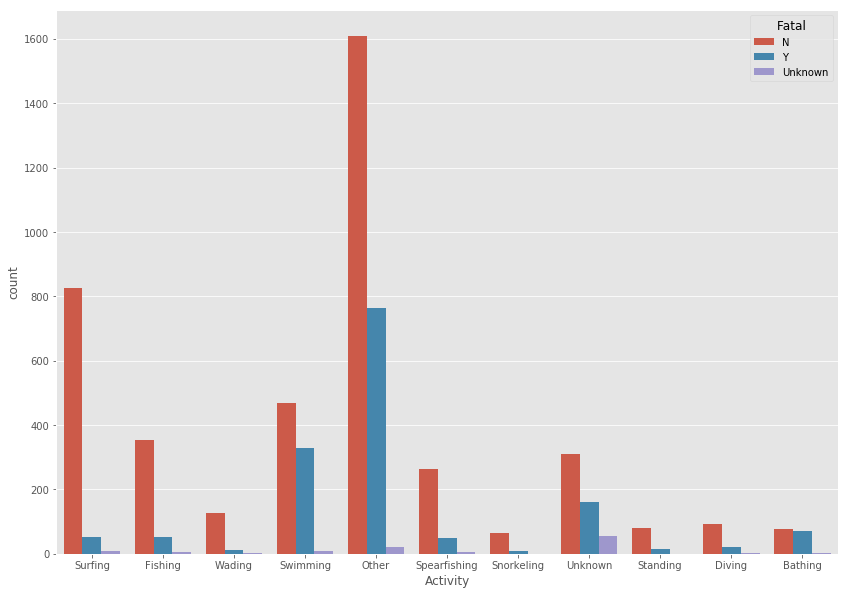

In [24]:
plt.figure(figsize=(14, 10))
style.use('ggplot')
sns.countplot(x='Activity',hue = 'Fatal',data = data)